## Dragon Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
 housing.head() # Gives the first 5 rows of the data.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts() # Counts no of rows with same value.

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285455,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705878,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline 

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

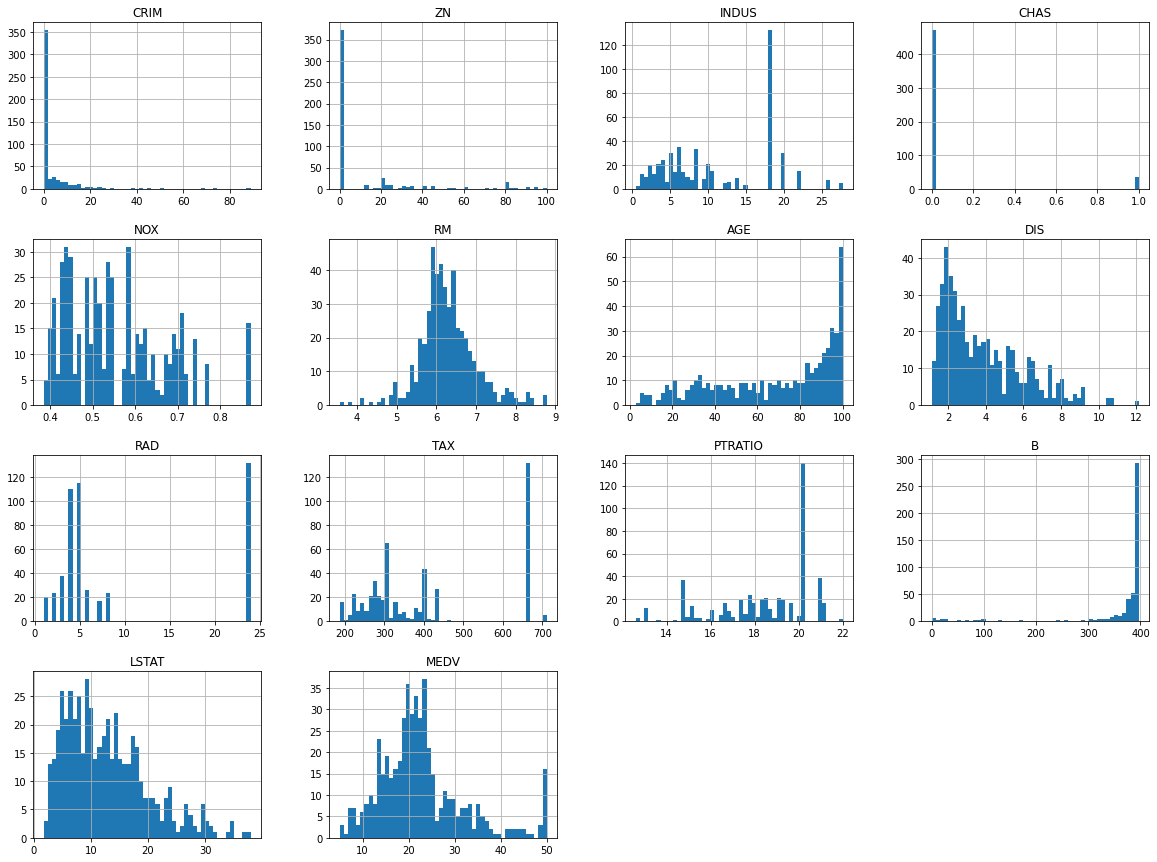

In [8]:
# %matplotlib inline  was written to show the data here in the notebook
# For plotting histogram
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train Test Splitting

In [9]:
# For learning purpose

import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    '''
    The problem with the below line of code is that it generates shuffled randomly.
    So at one point of time, it will know all the data which is not what we want .
    So to fix this, "np.random.seed(42)" was written, which fixes the values once the method is executed.
    '''
    shuffled = np.random.permutation(len(data))  # permutation randomly arranges the data's indices
    test_set_size = int(len(data) * test_ratio) # ratio of data to be trained and tested
    test_indices = shuffled[:test_set_size] # 0 to test_set_size of the data indices are stored in test_indices
    train_indices = shuffled[test_set_size:] # test_set_size to complete end of the data indices are stored in train_indices
    '''
    iloc()  function enables us to select a particular cell of the dataset, that is,it helps us select a value
    that belongs to a particular row or column from a set of values of data frame or data set.
    '''
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2) 
# train_set and test_set are given by the split_train_set dividing it in the ratio 0.2

In [11]:
print(f"Rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set : 405
Rows in test set: 101


In [12]:
# The abovesplit_train_test is available under sklearn.model_selection module with name train_test_split
from sklearn.model_selection import train_test_split
'''
var housing is the data.
var test_size is the ratio.
random_state is the np.random_seed(random_state) which fixes the data.
'''
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [13]:

# But here the problem is that we cannot be sure how the data has been divided.
# For example,
# take the data under CHAS row, what if data was fully utilised in the test_set ,
# then the model will predict wrong output if the it was very important.
# So we would want to divide it equally.
# To do this task we use, stratified sampling.

# To explain this :
# Consider that aleins visit the Earth and they want to know how humans look like.
# Now imagine that they saw only Indians or Americans. 
# Whats next ? 
# Then it's possible that they learn the wrong pattern. Such as they think that the humans have white hairs only which is not 
# true.
# To solve this you would like to take some population from every part of the planet and teach them with that data.

# Similarly for machine learning....

# So you will have to teach it with stratified sampling.
# Thankfully  you have a method in scikitlearn.


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts() # Give me the numbers of the same data under CHAS row in test set.

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts() # Give me the numbers of the same data under CHAS row in train set.

0    376
1     28
Name: CHAS, dtype: int64

In [17]:
# if you are solving a real problem then you don't need to look for correlations.
housing = strat_train_set.copy() # Now housing is the train set.

## Looking for Correaltions

In [18]:
# Taking out insights
corr_matrix = housing.corr()


# Tells us that if we increase a given value, then how much MEDV will be increased
# Strong positive coorelation means that if you increase a certain value then the given value is increased
# Strong negative coorelation means that if you increase a certain value then the given value is decreased

corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679900
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

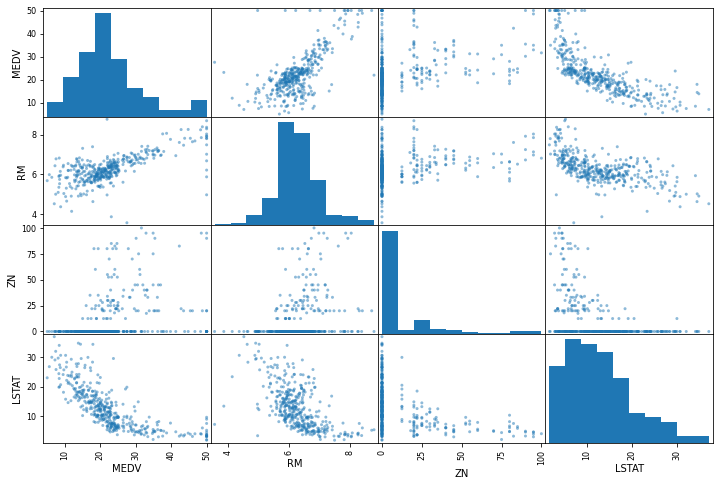

In [19]:
# Taking out insights by plotting
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize= (12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

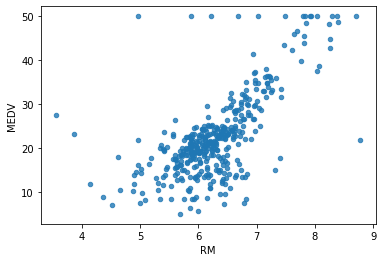

In [20]:
# Plot Scatter graph 
# Note : alpha means that places which are dense will be marked dark.
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying Out Attribute Combintations

In [21]:
housing["TAXRM"] = housing["TAX"] / housing["RM"] # Adding row tax per room

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
# Taking out insights
corr_matrix = housing.corr()


# Tells us that if we increase a given value, then how much MEDV will be increased
# Strong positive coorelation means that if you increase a certain value then the given value is increased
# Strong negative coorelation means that if you increase a certain value then the given value is decreased

corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679900
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527903
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

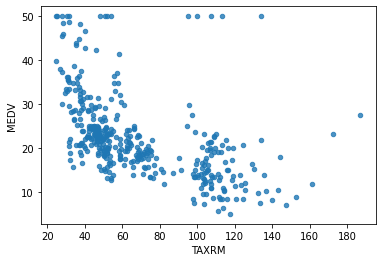

In [24]:
# Plot Scatter graph 
# Note : alpha means that places which are dense will be marked dark.
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8) # Plotting tax per room with respect to price

In [25]:
housing = strat_train_set.drop("MEDV", axis=1) # Remove the MEDV for training.
housing_labels = strat_train_set["MEDV"].copy() # get train_sets housing cost

## Missing attributes

In [26]:
# To take care of missing attributes, you have three options:
#     1. Get rid of missing data points
#     2. Get rid of whole attribute
#     3. Set the value to some vallue(0, mean or median)

In [27]:
a = housing.dropna(subset=["RM"]) # Option 1
a.shape
# Note that original housing data frame will remain unchanged

(400, 13)

In [28]:
housing.drop("RM", axis=1).shape # Option 2
# Note there is no RM Column(14) and also note that original housing data frame will remain unchanged

(404, 12)

In [29]:
# Option 3
median = housing["RM"].median()
housing["RM"].fillna(median) # Fill places where nothing is available with median
# Note that original housing data frame will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
housing.shape

(404, 13)

In [31]:
housing.describe() # Before we started imputing i.e, filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281190,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716281,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_ # Show me the values you calculated imputer !
# Note it calcualted median for every column

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe() # Filled the missing rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280520,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712749,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

Primarily three types of objects

1. Estimators - It estimates some parameter based on dataset. Eg. imputer :
    It has a fit method and transform method:
        Fit method : Fits the dataset and calcualtes the internal parameters
            
2. Transformers - transform method takes input and returns output based on the learnings from fit() :
    It also has a convenience method called fit_transform() which fits and transforms.
        
3. Predictors - LinearRegression model is an example of predictor :
    fit() and predict() are two comman functions. It also gives score fuction which will evaluate the predictions.

# Feature Scaling

Primarily there are two methods of feature scaling :
1. Min-maz scaling (Normalization)
    (value-min)/(max-min)
    Sklearn provides a class MinMaxScaler for this
   
2. Standardization
    (value-mean)/standarddeviation
    Sklearn provides a class called Standard Scaler for this
    Note : Standardization is more appropriate since when you change data min-max value can be changed which will have a great effect but in Standardization...
    

## Creating a Pipeline

In computing, a pipeline, also known as a data pipeline, is a set of data processing elements connected in sereies,
where the output of one element is the input of the next one.
Basically to write code.

In [35]:
# Note a machine learning algorithm works perfectly when data is at the same scale 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # .....add as many as you want in your pipline.
    ('std_scaler', StandardScaler()),
])


In [36]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [37]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estates

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression() # Changing the model - rmse : 4. ...
# model = DecisionTreeRegressor() # Changing the model But is overfitted since rmse = 0.0
# But we want the model to learn the trend not the noise
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [39]:
some_data = housing.iloc[:5]

In [40]:
some_labels = housing_labels.iloc[0:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([22.493, 25.575, 16.318, 23.377, 23.388])

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions) # mse = Mean Squared Error
rmse = np.sqrt(mse)

In [45]:
rmse

1.1675067038203017

## Using better evaluation technique - Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores # Errors are less as compared to linear Regressor Out 43

array([2.77928402, 2.70686428, 4.37849759, 2.56638927, 3.31415083,
       2.60018854, 4.81379732, 3.26577714, 3.37844338, 3.18135432])

In [48]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std()) # std = standard deviation

In [49]:
print_scores(rmse_scores)

Scores:  [2.77928402 2.70686428 4.37849759 2.56638927 3.31415083 2.60018854
 4.81379732 3.26577714 3.37844338 3.18135432]
Mean:  3.2984746684245634
Standard deviation:  0.7160442457581861


Quiz: Convert this notebook into a python file and run the pipeline using Visual Studio Code

## Saving the model

In [50]:
from joblib import dump, load
dump(model, "Dragon.joblib")

['Dragon.joblib']

## Testing the model on test data

In [51]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse= mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("Predictions: ", final_predictions)
print("Test data : ", list(Y_test))

Predictions:  [24.841 11.465 25.368 22.035 18.534 15.038 19.854 14.431 31.45  40.531
 19.965 11.708 23.863 29.108 19.553 10.726 31.644 14.513 23.611 19.049
 19.731 18.147 17.4   22.148 18.476 30.575 16.318 32.732  8.808 33.615
 23.676 21.312 22.895 10.843 20.76  11.209 42.745 24.248 23.334 41.584
 23.837 29.346 20.802 20.984 19.467 33.665 44.452 20.013 20.275 21.856
 21.442 14.624 21.217 15.057 24.812 32.66  42.489 28.299 19.302 20.933
 47.377 10.039 18.874 24.639 15.034 32.707 19.514 17.962 18.947 33.96
 27.359 22.482 21.484 22.357 35.045 12.767 15.876 19.934 20.841 21.457
 22.377 21.591 14.258 22.727 20.831 21.179 14.012 21.532 22.075 23.023
 18.773 27.328  7.311 26.169 18.89  29.9   19.525 31.301 14.78  26.383
 20.876 20.139]
Test data :  [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31

In [52]:
final_rmse

2.9384761723870194

In [53]:
prepared_data[0] # Taking a data for usage

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24234844, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [54]:
from joblib import dump, load
import numpy as np
model = load("Dragon.joblib")

In [55]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       0, 91.31238772,  25.61111401, -15543.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.985])